In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [2]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
df = pd.read_csv("/dataset.csv")

**Partie 1 : EDA**

**1.1 Vue d'ensemble des données :**

In [ ]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55702.000000,55696.000000,55702.000000,55696.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,...,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000,55702.000000
mean,27850.497523,44.976569,164.648666,65.864245,82.045207,1.012615,1.007447,1.025583,1.026139,121.493268,...,57.290744,114.963789,14.622418,1.087196,0.885708,26.181932,27.034236,39.948512,0.213314,0.367258
std,16079.922395,170.266643,9.194136,12.820222,9.274171,0.486833,0.485928,0.157888,0.159550,13.675858,...,14.739488,40.925518,1.564476,0.404848,0.221523,19.353940,30.945522,50.286996,0.409651,0.482062
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13925.250000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27850.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41775.750000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,40000.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [ ]:
len(df)

55702

In [ ]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

df.columns nous permet d'avoir les différentes colonnes du jeu (voir ci-dessus). len(df) nous permet d'avoir le nombre de lignes. Il y en a 55702.






In [ ]:
df.isnull().sum()

ID                     0
gender                 0
age                    6
height(cm)             0
weight(kg)             6
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

Il y a 6 valeurs manquantes dans la colonne "age" et 6 manquantes dans "weight"

**1.2 Statistiques descriptives**

In [ ]:
smokers = df[df['smoking'] == 1]

moy_age = smokers['age'].mean()
moy_height = smokers['height(cm)'].mean()
moy_weight = smokers['weight(kg)'].mean()

print(moy_age,moy_height,moy_weight)

43.560813453265546 169.4354010852031 70.95937622213532


<Axes: >

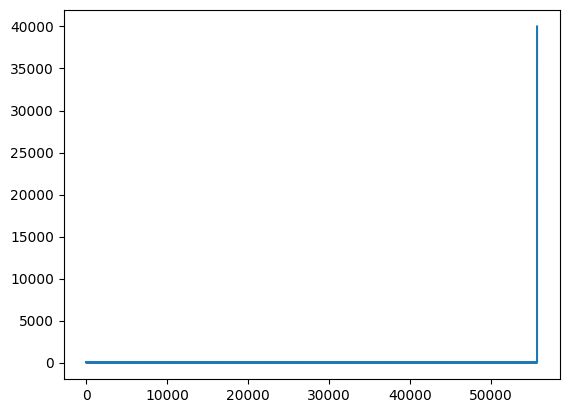

In [ ]:
smokers['age'].plot()

<Axes: >

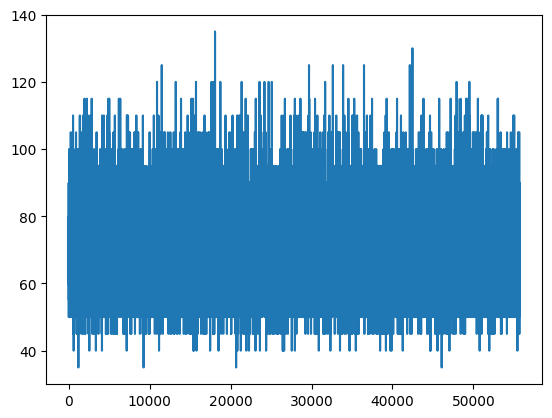

In [ ]:
smokers['weight(kg)'].plot()

<Axes: >

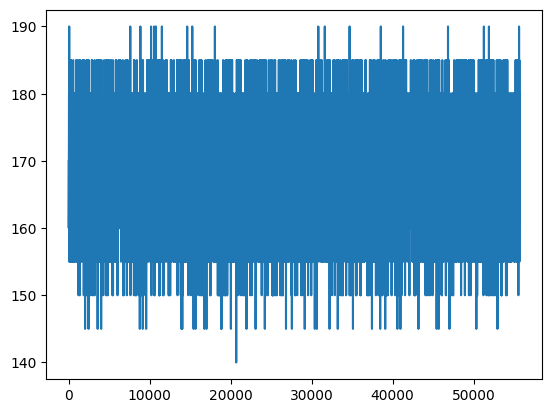

In [ ]:
smokers['height(cm)'].plot()

Les graphiques ne sont pas terribles mais on voit des valeurs aberrantes comme un âge à 4000 ans. Je ferais un scatter plot si j'ai le temps d'ici la fin de la séance.

In [ ]:
ecart_type = smokers['hemoglobin'].std()
print(ecart_type)

1.137559808271384


L'écart type de l'hémoglobine chez les fumeurs est d'environ 1.137559808271384

**1.3 Distribution de la donnée :**




20457

35245

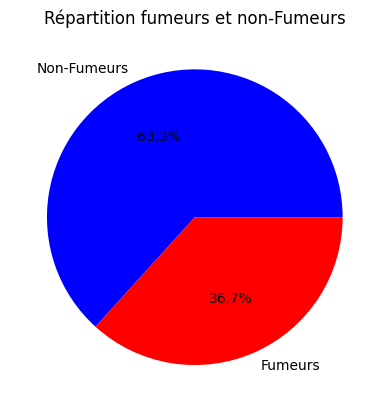

In [ ]:
non_smokers = df[df['smoking'] == 0]

smokers_count = smokers.shape[0]
non_smokers_count = non_smokers.shape[0]

display(smokers_count)
display(non_smokers_count)

labels = ['Non-Fumeurs', 'Fumeurs']
sizes = [non_smokers_count, smokers_count]
colors = ['blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Répartition fumeurs et non-Fumeurs')

plt.show()

19598
859


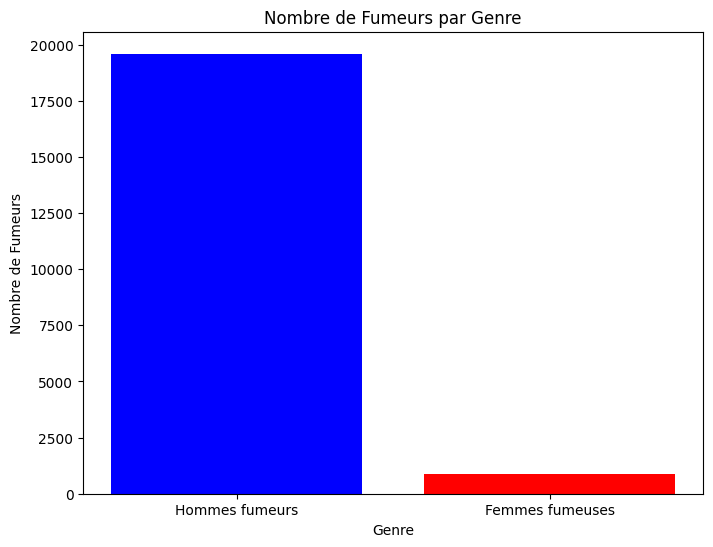

In [ ]:
man_smokers = df[(df['smoking'] == 1) & (df['gender'] == 'M')]
man_smokers_count = man_smokers.shape[0]
print(man_smokers_count)

woman_smokers = df[(df['smoking'] == 1) & (df['gender'] == 'F')]
woman_smokers_count = woman_smokers.shape[0]
print(woman_smokers_count)

labels = ['Hommes fumeurs', 'Femmes fumeuses']
counts = [man_smokers_count, woman_smokers_count]
colors = ['blue', 'red']

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
plt.title('Nombre de fumeurs par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de Fumeurs')
plt.show()





In [ ]:
moy_age_man_smokers = man_smokers['age'].mean()

print(moy_age_man_smokers)

43.437005664132265


La moyenne d'age des hommes fumeur est d'environ 43 ans

**1.4 Analyse de corrélation :**

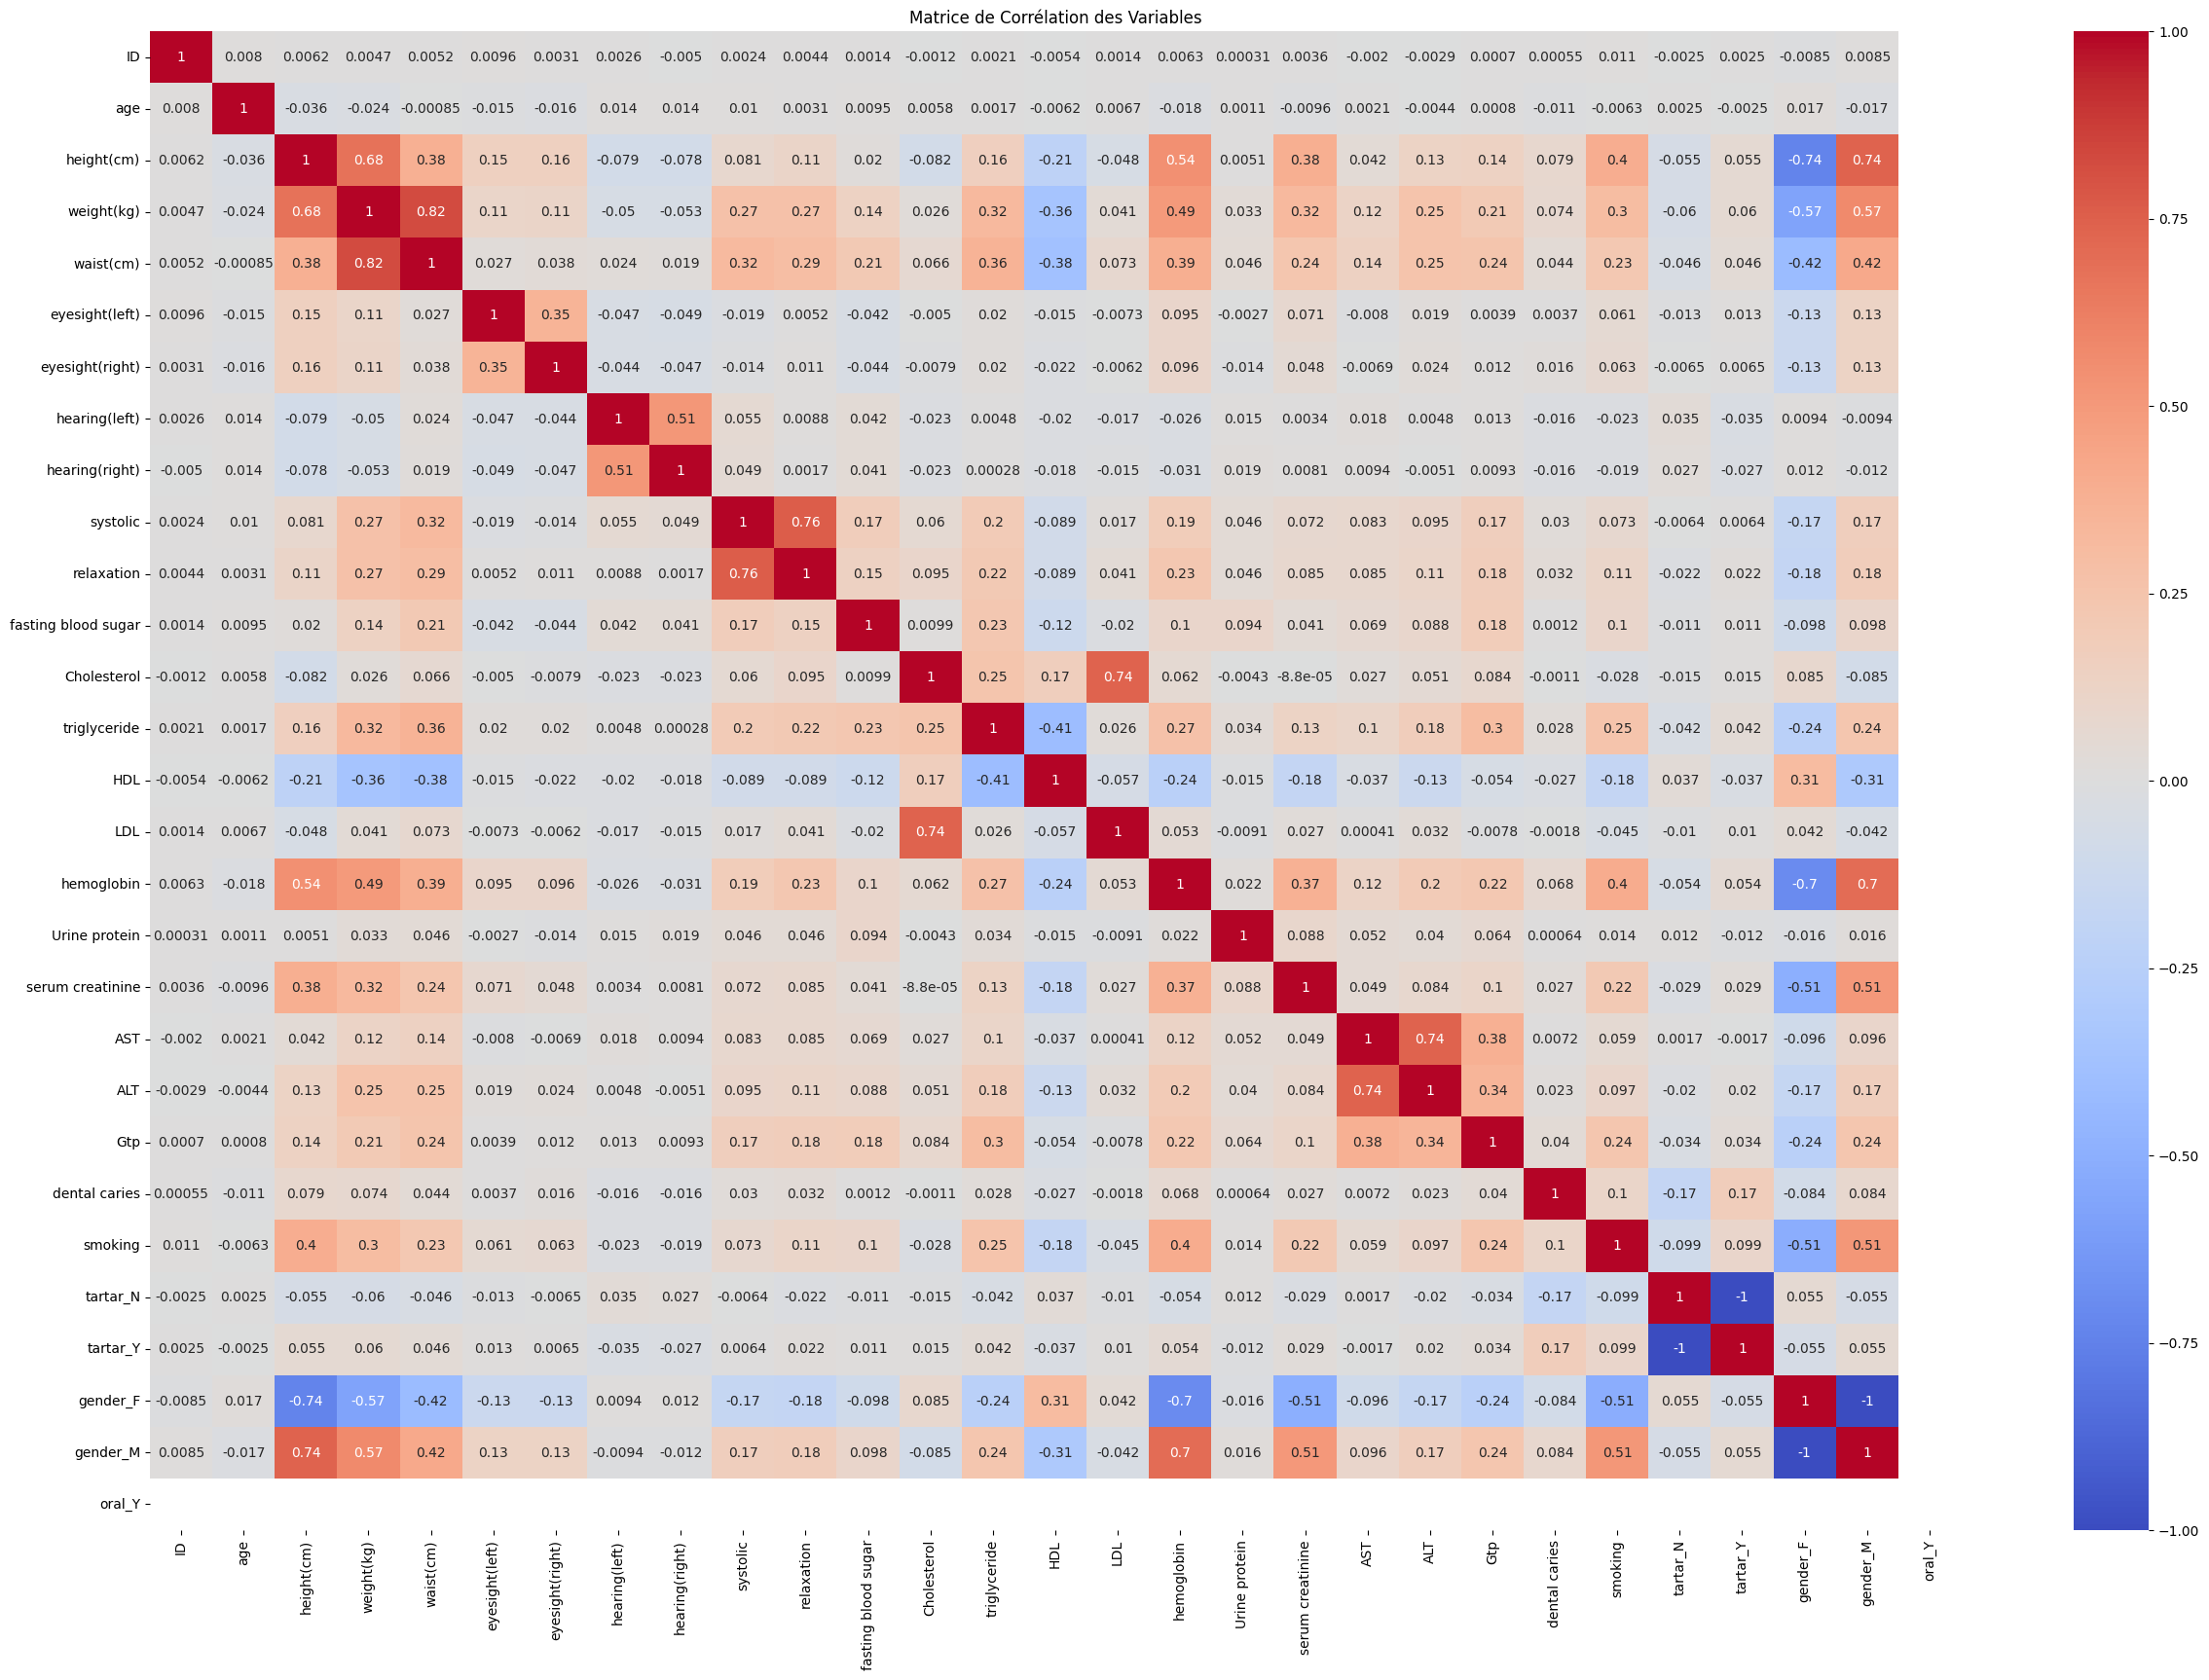

In [20]:
corr = df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Variables')
plt.show()

La fonction ne fonctionne pas car il y a des strings ("M" et "F"). Après l'encodage voici le résultat de la matrice.

**Partie 2 : Data pre-processing**

**2.1 Gestion des Valeurs Manquantes :**

Je vais supprimer les valeurs manquantes en utilisant dropna()

In [39]:
df_cleaned = df.dropna(axis=1)

df_cleaned = df_cleaned.dropna()

Cette méthode implique une perte de données (peut être dérangeant s'il y a beaucoup de valeurs manquantes).
Cette méthode peut également introduire un biais.
Dans notre cas, on a perdu que très peu de données donc c'est une solution cohérente.

**2.2 Encodage des catégories**

In [14]:
columns_to_encode = ['tartar', 'gender', 'oral']

encoder = OneHotEncoder(sparse=False)

encoded_columns = encoder.fit_transform(df[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

df = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Partie 3 :**

**3.1 Création de jeu de test et d'entraînement**

In [37]:
X = df.drop('smoking', axis=1)
y = df['smoking']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

20% des données sont réservées pour le set de test, et donc, par défaut, 80% des données sont utilisées pour l'ensemble d'entraînement.
La séparation permet d'évaluer la performance du modèle sur des données qu'il n'a jamais vues auparavant et donc éviter le surapprentissage.

In [38]:
model = LogisticRegression()

model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Ma LogisticRegression ne fonctionne pas car j'ai encore des NaNs. Mon dropna n'a pas fonctionné même après avoir modifié. Je vais essayer autre chose.

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [42]:
imputer = SimpleImputer(strategy='median')

pipeline = Pipeline([
    ('imputer', imputer),
    ('classifier', LogisticRegression())
])

Ca ne fonctionne toujours pas... Je n'arrive pas à aller plus loin.

In [44]:
model = LogisticRegression()

model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values